# Simple Linear Regression

In [2]:
from warnings import filterwarnings 
filterwarnings("ignore")

# Read the Dataset

In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\DELL\Downloads\50_Startups (1).csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()           # missing values

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

# understanding relationship between RND and PROFIT

<Axes: xlabel='RND', ylabel='PROFIT'>

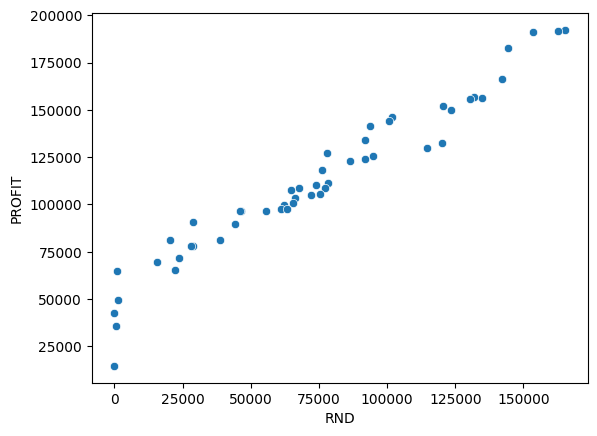

In [7]:
import seaborn as sns
sns.scatterplot(data=df, x="RND", y="PROFIT")

# Seperate X(RND) and Y(PROFIT)

In [9]:
x= df[["RND"]]
x.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [19]:
ypred = model.predict(x)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [10]:
y= df[["PROFIT"]]
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Step 4 - Fit the linear regression model

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model= LinearRegression()
model.fit(x,y)

LinearRegression()

### R2 score checking

In [15]:
model.score(x,y)

0.9465353160804393

### Checking coefficient and intercept of the line

In [16]:
model.coef_

array([[0.85429137]])

In [17]:
model.intercept_

array([49032.89914125])

### PROFIT_est= 49032.9 + 0.8543*RND

##### Model Evaluation

In [21]:
from sklearn.metrics  import mean_squared_error
mse = mean_squared_error(y,ypred)
print(f"Mean Squared Error :{mse:.2f} ")

Mean Squared Error :85120931.33 


In [22]:
25**(1/2)

5.0

In [24]:
rmse = mse**(1/2)
print(f"Root mean Squared Error : {rmse:.2f}")

Root mean Squared Error : 9226.10


In [25]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y,ypred)
print(f"Mean Absolute Error : {mae:.2f}")

Mean Absolute Error : 6910.98


In [27]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y, ypred)
print(f"Mean Absolute Percentage Error : {mape:.4f}")

Mean Absolute Percentage Error : 0.1107


In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y,ypred)
print(f"R2 Score    : {r2:.4f}")

R2 Score    : 0.9465


In [29]:
model.score(x,y)

0.9465353160804393

### R2 Score > 0.8 it is a good fit

<Axes: xlabel='RND', ylabel='PROFIT'>

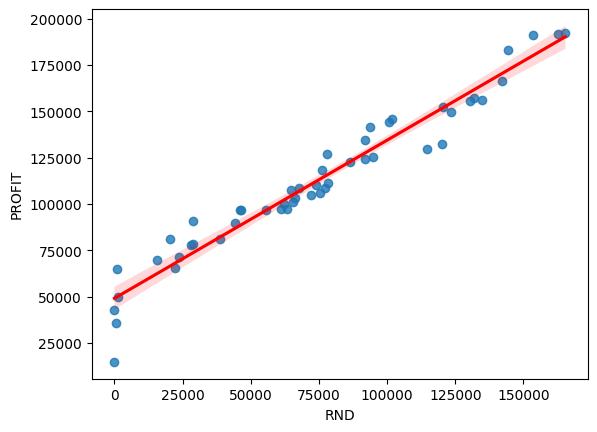

In [33]:
sns. regplot(data=df, x="RND", y="PROFIT",line_kws={"color" : "red"})

### Out of sample prediction

In [36]:
x.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [35]:
rnd = 2_00_000
profit_est = model.predict([[rnd]])
print(f"for given rnd : {rnd}, Profit Estimated is : {profit_est}" )

for given rnd : 200000, Profit Estimated is : [[219891.17332901]]


In [37]:
rnd = 1_30_000
profit_est = model.predict([[rnd]])
print(f"for given rnd : {rnd}, Profit Estimated is : {profit_est}" )

for given rnd : 130000, Profit Estimated is : [[160090.7773633]]
